# Performing Your First Clustering Analysis on the ATO Dataset

In [1]:
# import packages
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# url path
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/taxstats2015.csv'

In [3]:
# load data
df = pd.read_csv(file_url, usecols=['Postcode', 'Average net tax', 'Average total deductions'])
df.head()

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430


In [4]:
# instantiate kmeans
kmeans = KMeans(random_state=42)

In [5]:
# fit the model
X = df[['Average net tax', 'Average total deductions']]
kmeans.fit(X)

KMeans(random_state=42)

In [6]:
# make predictions
y_preds = kmeans.predict(X)
y_preds

array([1, 1, 4, ..., 4, 1, 4])

In [7]:
# add the predictions to the dataframe
df['cluster'] = y_preds
df.head()

,Postcode,Average total deductions,Average net tax,cluster
0,2000,2071,27555,1
1,2006,3804,28142,1
2,2007,1740,15649,4
3,2008,3917,53976,6
4,2009,3433,32430,3


# Clustering Australian Postcodes by Business Income and Expenses

In [8]:
# instantiate kmeans
kmeans = KMeans(random_state=8)

In [9]:
# fit the model
X = pd.read_csv(file_url, usecols=['Average total business income', 'Average total business expenses'])
kmeans.fit(X)

KMeans(random_state=8)

In [10]:
# make predictions
y_preds = kmeans.predict(X)
y_preds

array([3, 5, 6, ..., 0, 0, 2])

In [11]:
# add the predictions to the dataframe
X['cluster'] = y_preds
X.head()

,Average total business income,Average total business expenses,cluster
0,210901,222191,3
1,69983,48971,5
2,575099,639499,6
3,53329,32173,0
4,237539,222993,3


In [12]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Generate a pivot table with the averages of the two columns for each cluster
X.pivot_table(values=['Average total business income', 'Average total business expenses'],
               index='cluster', aggfunc=np.mean)

,Average total business expenses,Average total business income
cluster,,
0,38130.124827,53608.097087
1,250410.190476,301417.809524
2,82319.305970,104102.712687
3,173350.259740,208767.740260
4,812481.333333,837920.333333
5,58310.891111,76449.391111
6,449722.500000,488551.625000
7,118572.299517,145933.570048


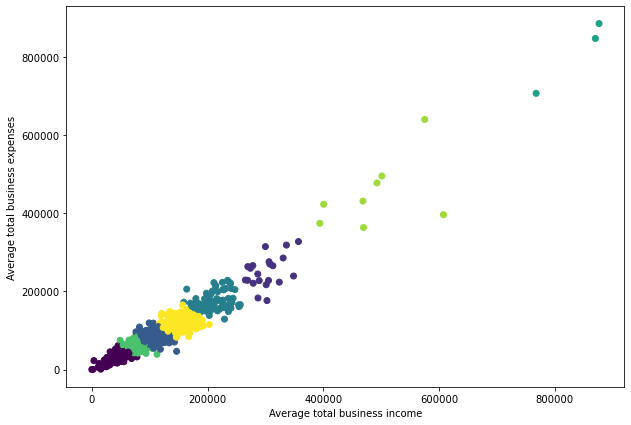

In [14]:
# plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster)
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

# Finding the Optimal Number of Clusters

In [15]:
# Create an empty pandas DataFrame called clusters and an empty list called inertia
clusters = pd.DataFrame()
inertia = []

In [16]:
# generate a list containing the range of cluster numbers
clusters['cluster_range'] = range(1, 15)

In [17]:
# Create a for loop to go through each cluster number and fit a k-means model 
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeans.inertia_)

In [18]:
# Assign the inertia list to a new column called 'inertia' from the clusters DataFrame
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1.333516e+13
1,2,7.063097e+12
2,3,3.718740e+12
3,4,2.341856e+12
4,5,1.713761e+12
5,6,1.225869e+12
6,7,9.442659e+11
7,8,7.488931e+11
8,9,6.346402e+11
9,10,5.646958e+11


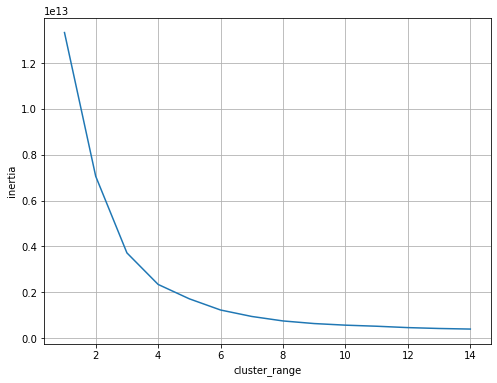

In [19]:
# plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(clusters.iloc[:, 0], clusters.iloc[:, 1])
plt.grid()
plt.xlabel('cluster_range')
plt.ylabel('inertia')
plt.show()

In [20]:
# Looking at the Elbow plot, identify the optimal number of clusters
optim_clusters = 4

In [21]:
# Train a k-means model with this number of clusters
kmeans = KMeans(random_state=42, n_clusters=optim_clusters)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [22]:
# make predictions
X['cluster2'] = kmeans.predict(X)

In [23]:
X.head()

,Average total business income,Average total business expenses,cluster,cluster2
0,210901,222191,3,1
1,69983,48971,5,0
2,575099,639499,6,2
3,53329,32173,0,0
4,237539,222993,3,1


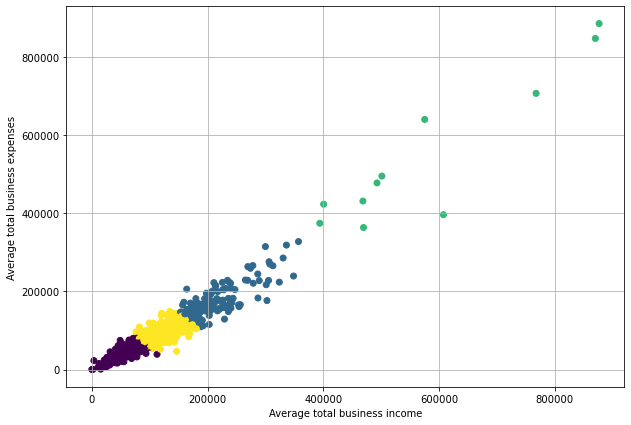

In [24]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster2)
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

# Using Different Initialization Parameters to Achieve a Suitable Outcome

fit a k-means model with n_init=1 and a random init

In [25]:
kmeans = KMeans(random_state=1, n_clusters=4, init='random', n_init=1)
kmeans.fit(X)

KMeans(init='random', n_clusters=4, n_init=1, random_state=1)

In [26]:
# make predictions and add them to the dataframe
X['cluster3'] = kmeans.predict(X)

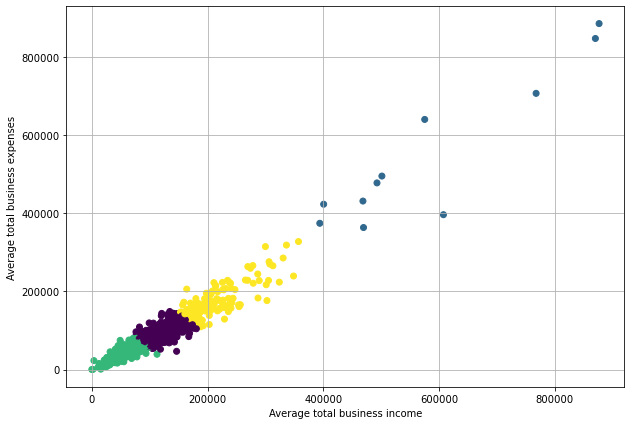

In [27]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster3)
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

fit a k-means model with n_init=10 and a random init

In [28]:
kmeans = KMeans(random_state=1, n_clusters=4, init='random', n_init=10)
kmeans.fit(X)

KMeans(init='random', n_clusters=4, random_state=1)

In [29]:
# make predictions and add them to the dataframe
X['cluster4'] = kmeans.predict(X)

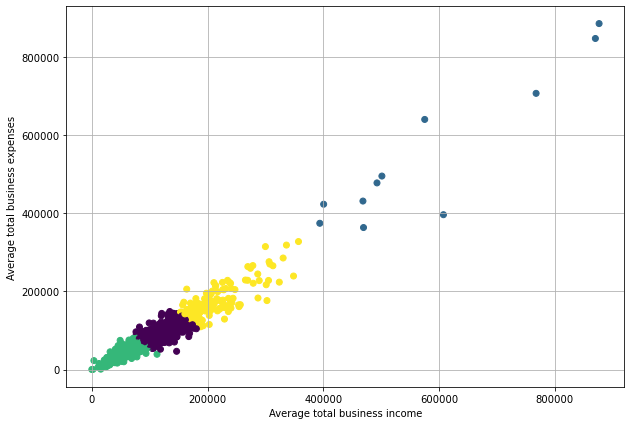

In [30]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster4)
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

fit a k-means model with n_init=100 and a random init

In [31]:
kmeans = KMeans(random_state=1, n_clusters=4, init='random', n_init=100)
kmeans.fit(X)

KMeans(init='random', n_clusters=4, n_init=100, random_state=1)

In [32]:
# make predictions and add them to the dataframe
X['cluster5'] = kmeans.predict(X)

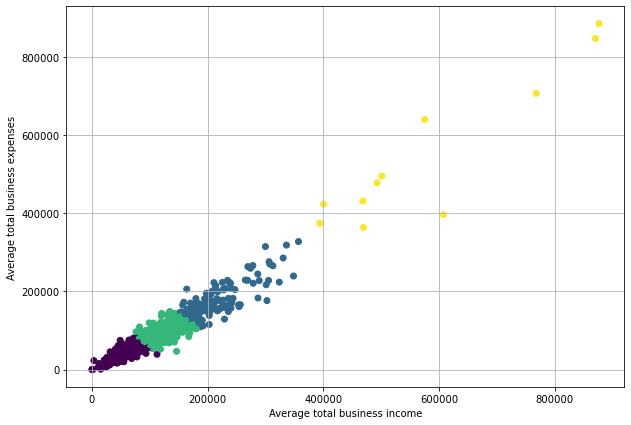

In [33]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster5)
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

# Finding the Closest Centroids in Our Dataset

In [34]:
X = X[['Average total business income', 'Average total business expenses', 'cluster']]

In [35]:
# calculate the minimum and maximum values of the 'Average total business income' and 'Average total business income'
business_income_min = X['Average total business income'].min()
business_income_max = X['Average total business income'].max()

business_expenses_min = X['Average total business expenses'].min()
business_expenses_max = X['Average total business expenses'].max()

In [36]:
# Print the values of these four variables
print(business_income_min)
print(business_income_max)
print(business_expenses_min)
print(business_expenses_max)

0
876324
0
884659


In [37]:
# import the random package and use the seed() method to set a seed of 42
import random
random.seed(42)

In [38]:
# Create an empty pandas DataFrame and assign it to a variable called centroids
centroids = pd.DataFrame()

In [39]:
# Generate four random values
centroids['Average total business income'] = random.sample(range(business_income_min, business_income_max), 4)
centroids['Average total business expenses'] = random.sample(range(business_expenses_min, business_expenses_max), 4)

In [40]:
# Create a new column called 'cluster' from the centroids DataFrame
centroids['cluster'] = centroids.index
centroids

,Average total business income,Average total business expenses,cluster
0,670487,288389,0
1,116739,256787,1
2,26225,234053,2
3,777572,146316,3


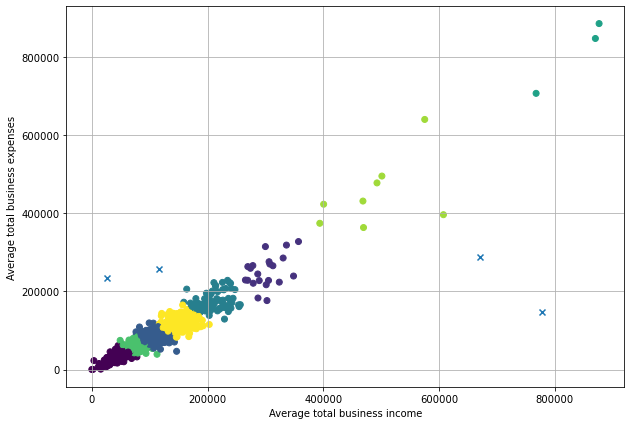

In [41]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], marker='x')
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

In [42]:
# Define a function that will calculate the squared_euclidean distance 
def squared_euclidean(x, y, centroid_x, centroid_y):
    return (x - centroid_x) ** 2 + (y - centroid_y) ** 2

In [43]:
# extract the first row's x and y coordinates
data_x = X.at[0, 'Average total business income']
data_y = X.at[0, 'Average total business expenses']

In [44]:
# calculate the squared_euclidean distance of the first observation 
distances = [squared_euclidean(data_x,
                               data_y,
                               centroids.at[i, 'Average total business income'],
                               centroids.at[i, 'Average total business expenses'])
            for i in range(4)]
distances

[215601466600, 10063365460, 34245932020, 326873037866]

In [45]:
# find the cluster with the shortest distance
cluster_index = distances.index(min(distances))

In [46]:
# Save the cluster index in a column called 'cluster' from the X DataFrame
X.at[0, 'cluster'] = cluster_index
X.head()

,Average total business income,Average total business expenses,cluster
0,210901,222191,1
1,69983,48971,5
2,575099,639499,6
3,53329,32173,0
4,237539,222993,3


# Standardizing the Data from Our Dataset

In [47]:
X = X[['Average total business income', 'Average total business expenses']]
X.head()

,Average total business income,Average total business expenses
0,210901,222191
1,69983,48971
2,575099,639499
3,53329,32173
4,237539,222993


In [48]:
# Import the MinMaxScaler and StandardScaler classes from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [49]:
# Instantiate and fit MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)

MinMaxScaler()

In [50]:
# Perform the min-max scaling transformation
X_min_max = min_max_scaler.transform(X)
X_min_max

array([[0.24066555, 0.25116005],
       [0.07985973, 0.05535579],
       [0.65626298, 0.72287627],
       ...,
       [0.05203897, 0.03244188],
       [0.0606488 , 0.04504561],
       [0.13814183, 0.10186976]])

In [51]:
# Fit a k-means model on the scaled data
kmeans = KMeans(random_state=1, n_clusters=4, init='k-means++', n_init=5)
kmeans.fit(X_min_max)

KMeans(n_clusters=4, n_init=5, random_state=1)

In [52]:
# make predictions
X['cluster8'] = kmeans.predict(X_min_max)

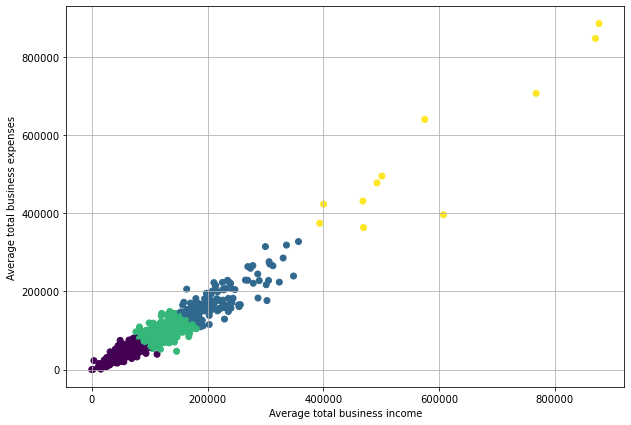

In [53]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster8)
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()

In [54]:
# Re-train the k-means model but on the z-score-standardized data
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

kmeans = KMeans(random_state=1, n_clusters=4, init='k-means++', n_init=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=5, random_state=1)

In [55]:
# make predictions
X['cluster9'] = kmeans.predict(X_scaled)

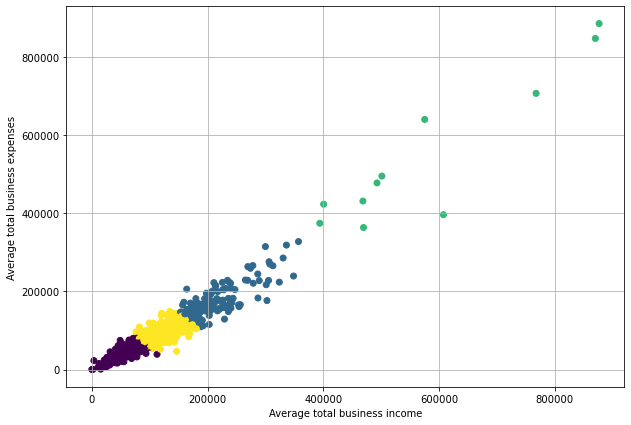

In [56]:
# plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.cluster9)
plt.grid()
plt.xlabel('Average total business income')
plt.ylabel('Average total business expenses')
plt.show()